In [1]:
output = pd.read_csv('/local/scratch_2/jls/virac_classifier/results/edr3_SJ_noalias/results_7380776_test.csv.tar.gz')

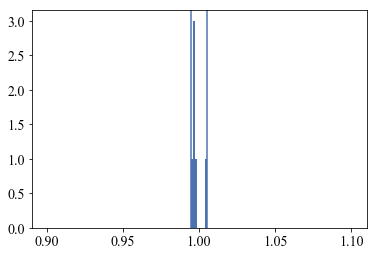

In [132]:
plt.hist(output['lsq_period'][(output['class']!='CONST')&(output['prob']>0.9)],bins=150,range=[0.9,1.1]);

plt.axvline(1.-0.005)
plt.axvline(1.+0.005)

In [29]:
import sqlutilpy
sys.path.append('../')
import sys
sys.path.append('../')
from fine_classif.feat_extract.compute_feats import correct_to_HJD, fourier_poly_chi2_fit_full, \
    retrieve_fourier_poly, LombScargle
from fine_classif.feat_extract.compute_feats import sigclipper, \
optimum_regularization, check_significant_second_minimum, find_phase_of_minimum, source_feat_extract

from config import configuration
config = configuration()
config.request_password()

def get_lightcurve(sourceid):

    lcs = pd.DataFrame(sqlutilpy.get('''
                                select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_train_zyjhk where sourceid={0}'''.format(sourceid),
                     **config.wsdb_kwargs))
    
    if len(lcs)==0:

        lcs = pd.DataFrame(sqlutilpy.get('''
                                    select sourceid, 
                                    unnest(mjdobs) as mjdobs,
                                    unnest(mag) as mag,
                                    unnest(emag) as emag,
                                    unnest(filterid) as filterid,
                                    unnest(chi) as chi,
                                    unnest(ast_res_chisq) as ast_res_chisq,
                                    unnest(ambiguous_match) as ambiguous_match  
                                    from leigh_smith.virac2_ts_tmolnar_variables where sourceid={0}'''.format(sourceid),
                         **config.wsdb_kwargs))
    
    return lcs


 ·············


In [143]:
output['sourceid'][(output['class']!='CONST')&(output['prob']>0.8)&(output['lsq_period']>0.9)&(output['lsq_period']<1.1)]

115     9270237007197
294     9270237016107
778     9270237033143
1839    9274332026737
2010    9274332032439
2044    9274332033387
2181    9274332038650
3497    9274333037996
4388    9278429028239
4440    9278429030247
4465    9278429031450
Name: sourceid, dtype: int64

In [126]:
output['sourceid'][(output['class']=='RRab')&(output['prob_nofap']>0.)]

11      9270237000677
2177    9274332038425
2808    9274333016771
3015    9274333023265
3250    9274333030775
4477    9278429031807
Name: sourceid, dtype: int64

In [145]:
output_old = pd.read_csv('../results_7380776_test.csv.tar.gz')

In [161]:
out_joint = pd.merge(output, output_old, on='sourceid', how='inner')

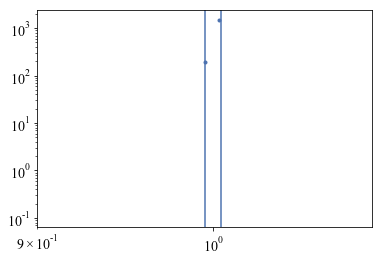

In [184]:
out_joint_fl = (out_joint['prob_x']>0.)&(out_joint['class_nofap']=='RRab')
plt.plot(out_joint['lsq_period_x'][out_joint_fl],out_joint['lsq_period_y'][out_joint_fl],'.')
plt.semilogy()
plt.semilogx()
plt.xlim(0.9,1.1)
plt.axvline(1-5e-3)
plt.axvline(1+5e-3)

In [334]:
output['sourceid'][(output['class']!='CONST')&(output['prob']>0.)&(output['lsq_period']>0.33)&(output['lsq_period']<0.335)]

1787    9274332024934
1917    9274332029190
2177    9274332038425
2361    9274332046109
3074    9274333025407
3102    9274333026472
Name: sourceid, dtype: int64

In [252]:
output['sourceid'][(output['class']=='RRab')&(output['prob']<0.5)]

11      9270237000677
2177    9274332038425
Name: sourceid, dtype: int64

In [218]:
var = pd.read_pickle('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias_updated/variable_features_total.pkl')

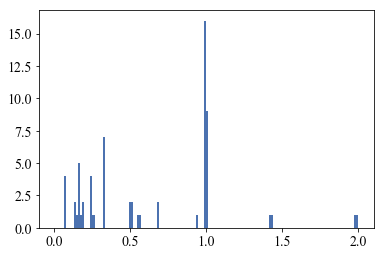

In [274]:
plt.hist(output['lsq_period'][output['class']!='CONST'],range=[0.,2.],bins=150);


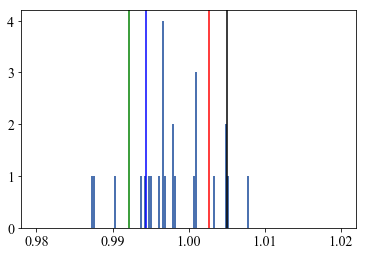

In [285]:
plt.hist(output['lsq_period'][output['class']!='CONST'],range=[0.98,1.02],bins=150);
# plt.axvline(1-0.005,color='k')
plt.axvline(1+0.005,color='k')
plt.axvline(0.9972-0.005,color='g')
# plt.axvline(0.9972+0.005,color='g')

# plt.axvline(1-1./365.,color='r')
plt.axvline(1+1./365.,color='r')

plt.axvline(0.9972-1./365.,color='b')
# plt.axvline(0.9972+1./365.,color='b')

In [244]:
var[['sourceid','cat_period']][(var['var_class']=='RRab')&(var['cat_period']>0.49)&(var['cat_period']<0.51)][:5]

,sourceid,cat_period
1468,8377307009375,0.496429
1628,8389596001929,0.498653
1786,8397790009416,0.501311
2166,8418266015082,0.495082
3206,8446935009067,0.497503


In [347]:
output[['sourceid','lsq_period']][(output['class']!='CONST')&(output['lsq_period']>0.33)&(output['lsq_period']<0.335)]

,sourceid,lsq_period
1787,9274332024934,0.332424
1917,9274332029190,0.332421
2177,9274332038425,0.332429
2361,9274332046109,0.332417
3074,9274333025407,0.332429
3102,9274333026472,0.332424


[ 0.5103238   1.04518443 23.11933715  1.04214628  0.23883845  0.33757422
  0.31319144  0.51105124  0.33789238  0.16419026  0.1926893   0.06441796
  0.27021303  0.06909341  0.23834275  0.28844258  0.23849743  0.21260514
  0.40595835  0.20214677  0.25518316  0.05258192  0.22373378  0.31123519
  0.18272258  0.05097879  0.49796281  0.08015487]
[ 0.5103238   1.04518443 23.11933715  1.04214628  0.23883845  0.33757422
  0.31319144  0.51105124  0.33789238  0.16419026  0.1926893   0.06441796
  0.27021303  0.06909341  0.23834275  0.28844258  0.23849743  0.21260514
  0.40595835  0.20214677  0.25518316  0.05258192  0.22373378  0.31123519
  0.18272258  0.05097879  0.49796281  0.08015487]
0.5103237968679057
-11.6097975401127
[ 0.5103238   1.04518443 23.11933715  1.04214628  0.23883845  0.33757422
  0.31319144  0.51105124  0.33789238  0.16419026  0.1926893   0.06441796
  0.27021303  0.06909341  0.23834275  0.28844258  0.23849743  0.21260514
  0.40595835  0.20214677  0.25518316  0.05258192  0.22373378

[]

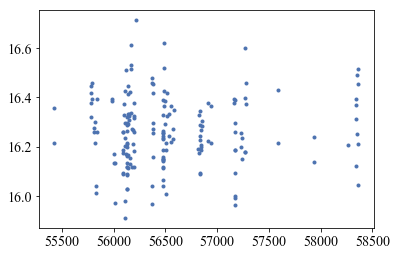

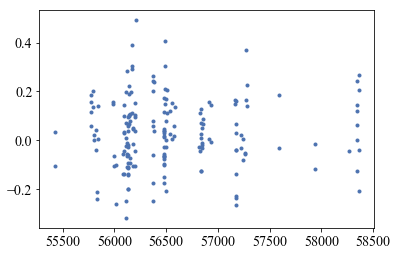

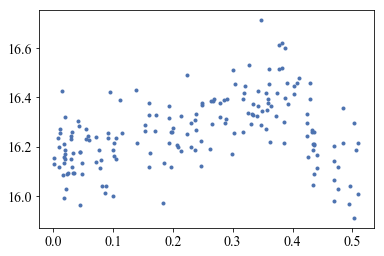

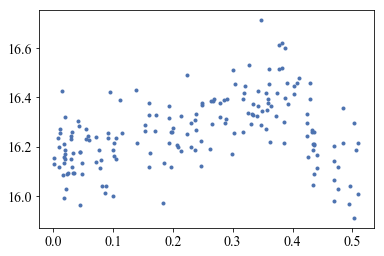

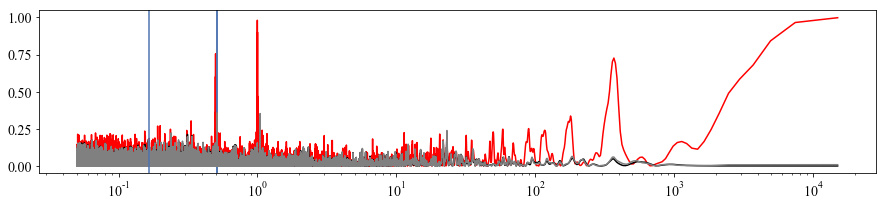

In [488]:
lcO=get_lightcurve(9274333030775)
lcO['mag'] = lcO['mag'].astype(np.float64)
lcO['emag'] = lcO['emag'].astype(np.float64)
lc = lcO.copy()
clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<11.829)&~((lc['chi']>5.)&(lc['mag']<13.2))&(lc['emag']>0.)
lc = sigclipper(lc[clean],float(config['sig_thresh']))

plt.figure()
pl=np.polyfit(lc['mjdobs'],lc['mag'],3,w=1./lc['emag'])
plt.plot(lc['mjdobs'],lc['mag']-0.*np.poly1d(pl)(lc['mjdobs']),'.')
plt.figure()
pl=np.polyfit(lc['mjdobs'],lc['mag'],3,w=1./lc['emag'])
plt.plot(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),'.')
# print(np.max(lc['mjdobs'])-np.min(lc['mjdobs']))
# plt.plot(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),'.')
freq,npower = LombScargle(lc['mjdobs'],lc['mag']-0.*np.poly1d(pl)(lc['mjdobs']),lc['emag']).autopower(maximum_frequency=20.,
                                                                                                  minimum_frequency=0.000066667)
freq,power = LombScargle(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag']).autopower(maximum_frequency=20.,
                                                                                                  minimum_frequency=0.000066667)
freq,wpower = LombScargle(lc['mjdobs'],np.ones_like(lc['mag']),lc['emag'],center_data=False, fit_mean=False).autopower(
                          maximum_frequency=20.,minimum_frequency=0.000066667)
ss=source_feat_extract([0.,0.,lcO],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
                   method_kwargs={'irreg':True}, lomb_kwargs={'period_tol':0.,'freq_max':0., 'poly_detrend':False});
print(ss['lsq_period'])
print(ss['log10_fap_ls'])

# ss=source_feat_extract([0.,0.,lcO],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
#                    method_kwargs={'irreg':True}, lomb_kwargs={'period_tol':5e-3,'freq_max':0., 'poly_detrend':True});
# print(ss['lsq_period'])
# print(ss['log10_fap_ls'])

ss=source_feat_extract([0.,0.,lcO],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
                   method_kwargs={'irreg':True}, lomb_kwargs={'period_tol':5e-3,'freq_max':0., 'poly_detrend':False});
print(ss['lsq_period'])
print(ss['log10_fap_ls'])
plt.figure()
plt.plot(lc['mjdobs']%ss['lsq_period'],lc['mag'],'.')

# ss=source_feat_extract([0.,0.,lcO],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
#                    method_kwargs={'irreg':True}, lomb_kwargs={'period_tol':0.,'freq_max':1e-2, 'poly_detrend':False});
# print(ss['lsq_period'])
# print(ss['log10_fap_ls'])

ss=source_feat_extract([0.,0.,lcO],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
                   method_kwargs={'irreg':True}, lomb_kwargs={'period_tol':0.,'freq_max':1./200., 'poly_detrend':True});
print(ss['lsq_period'])
print(ss['log10_fap_ls'])

# ss=source_feat_extract([0.,0.,lcO],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
#                    method_kwargs={'irreg':True}, lomb_kwargs={'period_tol':0.,'freq_max':1./200., 'poly_detrend':False});
# print(ss['lsq_period'])
# print(ss['log10_fap_ls'])

from scipy.signal import find_peaks
fp = find_peaks(power)[0]
bf=1./freq[fp][np.argsort(power[fp])[::-1][:50]]
bfp=power[fp][np.argsort(power[fp])[::-1][:50]]
# print(1./bf)
#
from fine_classif.feat_extract.lc_utils import is_window_function_peak, is_window_function_peak_v2
# print(is_window_function_peak(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag'],
#                               bf,bfp))
# print(is_window_function_peak_v2(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag'],
#                               bf,bfp))

bfL = bf[bf>200.]
print(bfL)
# print(bfL)
plt.figure()
plt.plot(lc['mjdobs']%ss['lsq_period'],lc['mag'],'.')
plt.figure(figsize=[15.,3.])

plt.plot(1./freq, wpower, color='r')
for ii in range(len(bfL))[:0]:
#     print(is_window_function_peak_v2(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag'],
#                                   bf-bfL[ii],bfp))
#     print(is_window_function_peak_v2(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag'],
#                                   bf+bfL[ii],bfp))
    plt.plot(1./(freq+1./bfL[ii]), wpower)
    plt.plot(1./(freq-1./bfL[ii]), wpower)

plt.axvline(ss['lsq_period'])
plt.axvline(ss['lsq_period'])
# plt.plot(1./(freq-1./2939.), wpower)
# plt.plot(1./(freq+1./2939.), wpower)

plt.plot(1./freq, power, color='k')
plt.plot(1./freq, npower, color='gray')
plt.axvline(0.16621208)

# plt.plot(1./(freq-1./365.), wpower)
# plt.xlim(-100.,4000.)

# plt.xlim(ss['lsq_period']*0.99,ss['lsq_period']*1.01)

# plt.xlim(0.165,0.167)
# plt.xlim(1.1,1.2)
# plt.axvline(0.9999/3.)
# plt.xlim(0.1,1500.)
# plt.xlim(0.1,2.)
plt.semilogx()

In [435]:
tt_l = pd.DataFrame(sqlutilpy.get('''select * from jason_sanders.virac2_variables where class='EW' ''', **config.wsdb_kwargs))

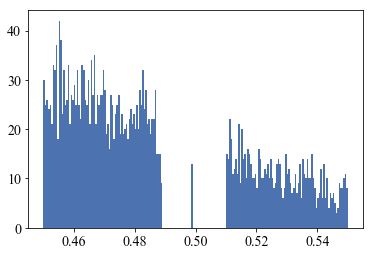

In [462]:
plt.hist(tt_l['period'][(tt_l['prob']>0.5)&(tt_l['b']<-6.)],range=[0.45,0.55],bins=200);
# plt.axvline(0.9972*(2/5),color='k',ymin=0.9)

In [318]:
import pickle
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_features_batch0.pkl', 'rb') as v:
    ttt = pickle.load(v)

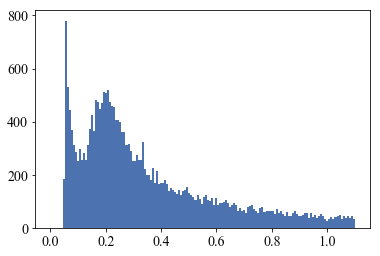

In [324]:
plt.hist(ttt['lsq_period'][ttt['var_class']=='EA/EB'],range=[0.,1.1],bins=150);

In [ ]:
output['log']

In [291]:
output[['prob','prob_nofap','log10_fap']]

,prob,prob_nofap,log10_fap
0,0.999800,0.479127,-1.559219
1,0.999862,0.528559,-3.114171
2,0.996397,0.928287,-28.569105
3,0.999898,0.459687,-1.123116
4,0.999884,0.480374,-0.000025
5,0.995808,0.442928,-4.998211
6,0.992890,0.693309,-3.899173
7,0.999794,0.469553,-0.463559
8,0.998257,0.547589,-2.392219
9,0.998501,0.347970,-3.214284


In [298]:
output2 = pd.read_csv('/local/scratch_2/jls/virac_classifier/results/edr3_SJ_noalias_test2/results_7380776_test.csv.tar.gz')

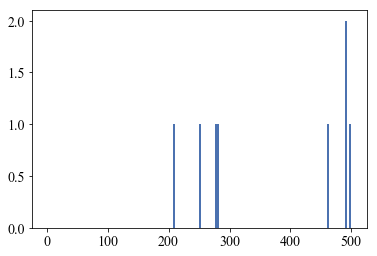

In [305]:
plt.hist(output2['lsq_period'][output2['class']!='CONST'],range=[0.,500.],bins=150,);

In [366]:
out_old = pd.read_csv('../results_7380776_test.csv.tar.gz')

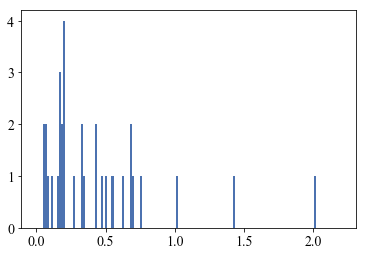

In [413]:
plt.hist(out_old['lsq_period'][out_old['class']!='CONST'],range=[0.,2.2],bins=150);

In [374]:
out_old['sourceid'][out_old['class']=='RRab']

83      9270237012816
160     9270237019892
288     9270237031672
350     9270237038619
858     9274332041048
1093    9274333016771
1532    9278429004242
1653    9278429022527
1659    9278429023328
1836    9278429044513
1855    9278429046092
Name: sourceid, dtype: int64